# Projeto de Métodos


In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [3]:
# Susceptible equation
def funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs):
    fs = (-beta*a*b) * hs
    fe = (beta*a*b - sigma*e) * hs
    fi = (sigma * e - gamma * b - mi * b) * hs
    fr = (gamma*b) * hs
    fd = (mi * b) * hs
    return [fs, fe, fi, fr, fd]

In [4]:
# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e):

    [a1, e1, b1, c1, d1] = funcSec(N, a, b, c, d, e, beta, gamma, mi, sigma, hs)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor * 0.5 for indice, valor in enumerate([a1, b1, c1, d1, e1])]

    [a2, e2, b2, c2, d2] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor * 0.5 for indice, valor in enumerate([a2, e2, b2, c2, d2])]

    [a3, e3, b3, c3, d3] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs)

    [ak, bk, ck, dk, ek] = [[a, b, c, d, e][indice] + valor for indice, valor in enumerate([a3, e3, b3, c3, d3])]

    [a4, e4, b4, c4, d4] = funcSec(N, ak, bk, ck, dk, ek, beta, gamma, mi, sigma, hs)

    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    d = d + (d1 + 2*(d2 + d3) + d4)/6
    e = e + (e1 + 2*(e2 + e3) + e4)/6
    return a, b, c, d, e

In [5]:
def SEIRD(N, b0, beta, gamma, hs, mi, sigma):

    # Initial condition
    a = float(N - 2) / N - b0
    b = float(1) / N + b0
    e = float(1) / N + b0
    c = 0.
    d = 0.

    sus, inf, rec, mort, exp = [], [], [], [], []
    for i in range(150):  # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        mort.append(d)
        exp.append(e)
        a, b, c, d, e = runge_kutta_4(N, a, b, c, beta, gamma, hs, mi, d, sigma, e)

    return sus, inf, rec, mort, exp

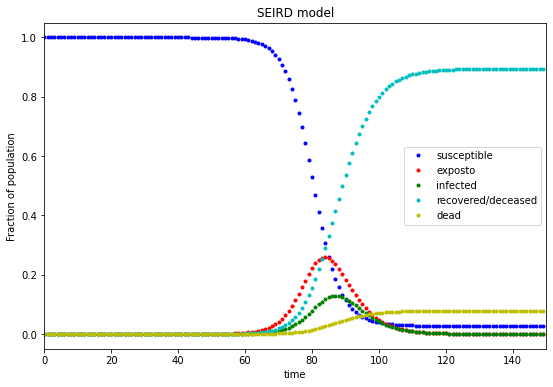

In [7]:
N = 1380*(10**6)
b0 = 0
beta = 1.38
gamma = 0.34
sigma = 0.19
mi = 0.03
hs = 1

sus, inf, rec, mort, exp = SEIRD(N, b0, beta, gamma, hs, mi, sigma)

f = plt.figure(figsize=(9,6))
plt.plot(sus, 'b.', label='susceptible');
plt.plot(exp, 'r.', label='exposto');
plt.plot(inf, 'g.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.plot(mort, 'y.', label='dead');
plt.title("SEIRD model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,150)
plt.savefig('SIR_example.png')
plt.show()